In [2]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import requests
import json
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.svm import SVR

### Collect the weather data for a given time interval
1. link: https://darksky.net/dev

In [4]:
data = pd.read_csv('weather.csv') ##reading the data for April

In [9]:
tem = data['temperature'].values
hum = data['humidity'].values
cloud = data['cloudCover'].values
wind = data['windSpeed'].values
#windBearing = data['windBearing'].values

In [10]:
bearing = []
for v in data['windBearing'].values:
    bearing.append(v)
    bearing.append(bearing[-1])
    bearing.append(bearing[-1])

In [11]:
apptem = []
for v in data['apparentTemperature'].values:
    apptem.append(v)
    apptem.append(apptem[-1])
    apptem.append(apptem[-1])

In [12]:
dew = []
for v in data['dewPoint'].values:
    dew.append(v)
    dew.append(dew[-1])
    dew.append(dew[-1])

In [13]:
temperature = []
for v in tem:
    temperature.append(v)
    temperature.append(temperature[-1])
    temperature.append(temperature[-1])

In [14]:
windspeed = []
for v in wind:
    windspeed.append(v)
    windspeed.append(windspeed[-1])
    windspeed.append(windspeed[-1])

In [15]:
humidity = []
for v in hum:
    humidity.append(v)
    humidity.append(humidity[-1])
    humidity.append(humidity[-1])

In [16]:
cloudCover = []
for v in cloud:
    cloudCover.append(v)
    cloudCover.append(cloudCover[-1])
    cloudCover.append(cloudCover[-1])

In [17]:
len(temperature),len(humidity),len(cloudCover),len(bearing)

(2160, 2160, 2160, 2160)

## Convert the timestamp to date:

In [19]:
data = pd.read_csv('xyz.csv')

In [20]:
data.head()

,00:00,00:20,00:40,01:00,01:20,01:40,02:00,02:20,02:40,03:00,...,20:40,21:00,21:20,21:40,22:00,22:20,22:40,23:00,23:20,Date
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-01 00:00:00
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-02 00:00:00
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-03 00:00:00
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-04 00:00:00
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-04-05 00:00:00


In [29]:
data = data.drop(['Date'],axis=1)

In [30]:
data.shape

(30, 71)

In [31]:
data.head()

,00:00,00:20,00:40,01:00,01:20,01:40,02:00,02:20,02:40,03:00,...,20:20,20:40,21:00,21:20,21:40,22:00,22:20,22:40,23:00,23:20
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
dx = np.array(temperature).reshape((30, 72)) 
dy = np.array(humidity).reshape((30,72))
dz = np.array(cloudCover).reshape(30,72)
dx1 = np.array(apptem).reshape((30, 72)) 
dy1 = np.array(dew).reshape((30,72))
dz1 = np.array(windspeed).reshape(30,72)

In [33]:
bear = np.array(bearing).reshape(30,72)

In [35]:
cl = list(data.columns)

In [36]:
cl.append('23:40')

In [38]:
temperature = pd.DataFrame(dx,columns=cl)
humidity = pd.DataFrame(dy,columns=cl)
ccover = pd.DataFrame(dz,columns=cl)
apptem = pd.DataFrame(dx1,columns=cl)
dew = pd.DataFrame(dy1,columns=cl)
windspeed = pd.DataFrame(dz1,columns=cl)

In [39]:
windBearing = pd.DataFrame(bear,columns=cl)

In [45]:
temperature = temperature.drop(['23:40'],axis=1)
humidity = humidity.drop(['23:40'],axis=1)
ccover = ccover.drop(['23:40'],axis=1)
dew = dew.drop(['23:40'],axis=1)
apptem = apptem.drop(['23:40'],axis=1)
#ccover = ccover.drop(['23:40'],axis=1)

In [46]:
wspeed  = windspeed.drop(['23:40'],axis=1)

In [47]:
windBearing  = windBearing.drop(['23:40'],axis=1)

### Taking reading from 6 am to 6 pm in the evening

In [50]:
temperature = (temperature.T.iloc[20:55]).T
humidity = (humidity.T.iloc[20:55]).T
energy = (data.T.iloc[20:55]).T
ccover = (ccover.T.iloc[20:55]).T

In [51]:
wspeed  = (wspeed.T.iloc[20:55]).T

In [52]:
dew  = (dew.T.iloc[20:55]).T

In [53]:
windBearing = (windBearing.T.iloc[20:55]).T

## converting temperature and energy in one column

In [60]:
tem,ene,hum,cloud = [],[],[],[]
for i in range(len(temperature.values)):
    for j in range(len(temperature.values[0])):
        tem.append(temperature.values[i][j])
for i in range(len(energy.values)):
    for j in range(len(energy.values[0])):
        ene.append(energy.values[i][j])
for i in range(len(humidity.values)):
    for j in range(len(humidity.values[0])):
        hum.append(humidity.values[i][j])
        
for i in range(len(ccover.values)):
    for j in range(len(ccover.values[0])):
        cloud.append(ccover.values[i][j])

In [61]:
windspeed = []
for i in range(len(wspeed.values)):
    for j in range(len(wspeed.values[0])):
        windspeed.append(wspeed.values[i][j])

In [62]:
dewpoint = []
for i in range(len(dew.values)):
    for j in range(len(dew.values[0])):
        dewpoint.append(dew.values[i][j])

In [63]:
wBearing = []
for i in range(len(windBearing.values)):
    for j in range(len(windBearing.values[0])):
        wBearing.append(windBearing.values[i][j])

## Energy Variation with Wind Bearing

In [91]:
data = pd.DataFrame(columns=['Temperature','Energy'])

In [92]:
data['Temperature'] = tem
data['Energy'] = ene

### Applying svm model

X_train -> time , Y_train -> Energy 

In [97]:
data.head()

,Temperature,Energy
0,84.88,0.706
1,84.65,1.366
2,84.65,2.404
3,84.65,3.546
4,85.29,4.682


### Preparing data for modeling

<h5>X_train - > Temperature, Energy</h5>
<h5>Y_train -> Energy</h5>

In [98]:
x = data['Energy'].values[1:]

In [99]:
data_copy = data.copy()

In [100]:
data = data.iloc[:1049]

In [101]:
data['Predicted_Energy'] = x

C:\Users\karan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
data.shape

(1049, 3)

In [103]:
np.corrcoef(data['Energy'],data['Predicted_Energy'])

array([[1.        , 0.97477689],
       [0.97477689, 1.        ]])

In [104]:
data.head()

,Temperature,Energy,Predicted_Energy
0,84.88,0.706,1.366
1,84.65,1.366,2.404
2,84.65,2.404,3.546
3,84.65,3.546,4.682
4,85.29,4.682,5.748


In [105]:
data.shape

(1049, 3)

In [117]:
day_reading = 35*21  ## 20 days test data
X_train = data[['Temperature','Energy']].iloc[:day_reading]
X_test = data[['Temperature','Energy']].iloc[day_reading:]
y_train = data['Predicted_Energy'].iloc[:day_reading]
y_test = data['Predicted_Energy'].iloc[day_reading:]

In [118]:
X_train.shape

(735, 2)

In [119]:
from sklearn.svm import SVR

# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.3947873163807159
Root Mean squared error using SVM on test data: 0.40458944043697764
Root Mean squared error using SVM on test data: 0.40559398422899834
Root Mean squared error using SVM on test data: 0.40621569018275705
Root Mean squared error using SVM on test data: 0.40779675311124225
Root Mean squared error using SVM on test data: 0.4181952534153172
Root Mean squared error using SVM on test data: 0.7012190210444256


In [121]:
y_pred.shape, y_test.shape

((314,), (314,))

In [123]:
def MAPE(y,yhat):
    d = 0
    for i in range(len(y)):
        d = d + abs(y[i]-yhat[i])/y[i]
    return (100*d)/len(y)

Mean squared error using SVM : 0.3947873163807159
MAPE using SVM : 16.37902388205232


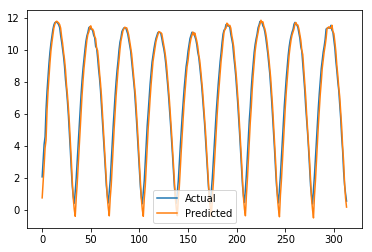

In [124]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(["Actual","Predicted"])
print("Mean squared error using SVM :", opt_v)
#print("MAPE using SVM :", MAPE(y_test.values,y_opt))
print("MAPE using SVM :", MAPE(y_test.values,y_pred))

In [125]:
from sklearn.svm import SVR

# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.6746238332932792
Root Mean squared error using SVM on test data: 3.5522470360714786
Root Mean squared error using SVM on test data: 2.582337150294775
Root Mean squared error using SVM on test data: 1.4263319957416742
Root Mean squared error using SVM on test data: 1.3190121171077702
Root Mean squared error using SVM on test data: 1.316709588923594
Root Mean squared error using SVM on test data: 1.2634285892415948


Mean squared error using SVM : 1.2634285892415948
MAPE using SVM : 36.25520311973175


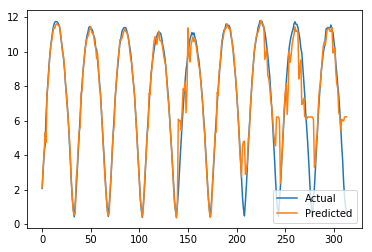

In [126]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Actual","Predicted"])
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

### Using time of the Day, Energy and Temperature for prediction

<h5>X_train -> Time, Energy, Temperature</h5>

<h5>Y_train -> Predicted_Energy</h5>

In [93]:
time = []
for i in range(0,30):
    for j in energy.columns:
        time.append(j)

In [94]:
data.head()

,Temperature,Energy,Predicted_Energy
0,84.88,0.706,1.366
1,84.65,1.366,2.404
2,84.65,2.404,3.546
3,84.65,3.546,4.682
4,85.29,4.682,5.748


In [95]:
time = time[:len(time)-1]

In [96]:
data['Time'] = time

In [97]:
data.head()

,Temperature,Energy,Predicted_Energy,Time
0,84.88,0.706,1.366,06:40
1,84.65,1.366,2.404,07:00
2,84.65,2.404,3.546,07:20
3,84.65,3.546,4.682,07:40
4,85.29,4.682,5.748,08:00


In [98]:
# converting the data into one hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data['Time'].values.reshape(-1,1))
X = enc.transform(data['Time'].values.reshape(-1,1))

In [99]:
X.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

In [100]:
day_d = pd.DataFrame(X.todense())

In [101]:
data = pd.concat([data,day_d],axis=1)

In [102]:
data.head()

,Temperature,Energy,Predicted_Energy,Time,0,1,2,3,4,5,...,25,26,27,28,29,30,31,32,33,34
0,84.88,0.706,1.366,06:40,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,84.65,1.366,2.404,07:00,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,84.65,2.404,3.546,07:20,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84.65,3.546,4.682,07:40,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,85.29,4.682,5.748,08:00,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
data = data.drop(['Time'],axis=1)

In [166]:
train = data.iloc[:700]
test = data.iloc[700:969]

In [167]:
X_train = train.drop(['Predicted_Energy'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy'],axis=1)
y_test = test['Predicted_Energy']

In [170]:
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.382569855735952
Root Mean squared error using SVM on test data: 0.3377384049478417
Root Mean squared error using SVM on test data: 0.22475123282694956
Root Mean squared error using SVM on test data: 0.12655168472984565
Root Mean squared error using SVM on test data: 0.12000142334046397
Root Mean squared error using SVM on test data: 0.3017535239528549
Root Mean squared error using SVM on test data: 2.2350064184236396


Mean squared error using SVM : 0.12000142334046397
MAPE using SVM : 2.031165322702394


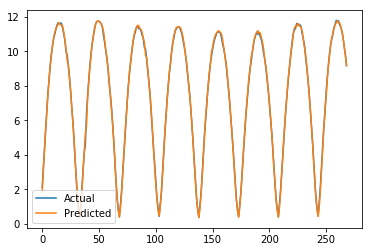

In [171]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Actual","Predicted"])
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [172]:
from sklearn.svm import SVR

# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.5651394494309994
Root Mean squared error using SVM on test data: 2.9453027781841348
Root Mean squared error using SVM on test data: 0.8095838592570229
Root Mean squared error using SVM on test data: 0.3030995761095935
Root Mean squared error using SVM on test data: 0.27435153137432905
Root Mean squared error using SVM on test data: 0.20546604897308757
Root Mean squared error using SVM on test data: 0.20994036589554887


Mean squared error using SVM : 0.20546604897308757
MAPE using SVM : 3.451204508273805


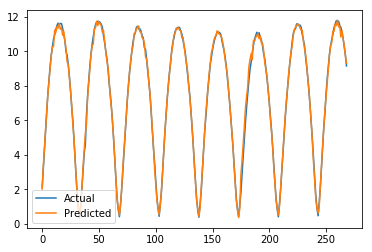

In [173]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Actual","Predicted"])
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

### Applying SVM

## Using Temperature, Time, Previous Energy Produced, Humidity 
<h5>X_train -> Temperature, Time, Humidity</h5>
<h5>Y_train -> Energy</h5>

In [106]:
data['humidity']  = hum[:len(hum)-1]

In [107]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,humidity
0,84.88,0.706,1.366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51
1,84.65,1.366,2.404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
2,84.65,2.404,3.546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
3,84.65,3.546,4.682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
4,85.29,4.682,5.748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48


In [203]:
X_train = data.drop(['Predicted_Energy'],axis=1).iloc[:700]
y_train = data['Predicted_Energy'].iloc[:700]
X_test = data.drop(['Predicted_Energy'],axis=1).iloc[700:]
y_test = data['Predicted_Energy'].iloc[700:]

In [205]:
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.613246035636323
Root Mean squared error using SVM on test data: 3.0308113963097028
Root Mean squared error using SVM on test data: 1.04878043838209
Root Mean squared error using SVM on test data: 0.506660773697509
Root Mean squared error using SVM on test data: 0.38872306671366075
Root Mean squared error using SVM on test data: 0.2401303219152098
Root Mean squared error using SVM on test data: 0.2386947537174345


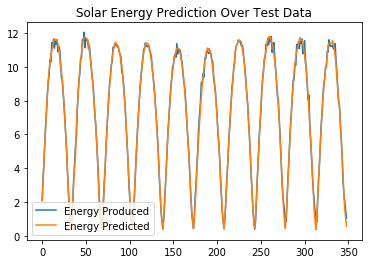

Optimal Result of the model : 0.2386947537174345
MAPE using SVM : 4.742740539734366


In [206]:
plt.plot(y_opt)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Optimal Result of the model :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [183]:
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.4023335657604889
Root Mean squared error using SVM on test data: 0.36700323982963595
Root Mean squared error using SVM on test data: 0.24646354798079548
Root Mean squared error using SVM on test data: 0.13051327154390485
Root Mean squared error using SVM on test data: 0.12429009866083322
Root Mean squared error using SVM on test data: 0.3844230066752455
Root Mean squared error using SVM on test data: 2.5115187738302382


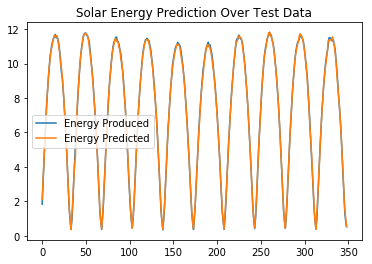

Optimal Result of the model : 0.12429009866083322
MAPE using SVM : 2.259577426920666


In [184]:
plt.plot(y_opt)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Optimal Result of the model :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [185]:
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred
print("Mean squared error using SVM on Test:", opt_v)

Root Mean squared error using SVM on test data: 3.613246035636323
Root Mean squared error using SVM on test data: 3.0308113963097028
Root Mean squared error using SVM on test data: 1.04878043838209
Root Mean squared error using SVM on test data: 0.506660773697509
Root Mean squared error using SVM on test data: 0.38872306671366075
Root Mean squared error using SVM on test data: 0.2401303219152098
Root Mean squared error using SVM on test data: 0.2386947537174345
Mean squared error using SVM on Test: 0.2386947537174345


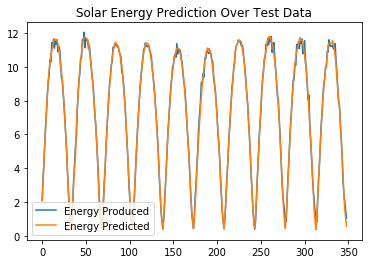

Mean squared error using SVM on Test: 0.2386947537174345
MAPE using SVM : 4.742740539734366


In [186]:
plt.plot(y_opt)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Mean squared error using SVM on Test:", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [187]:
from sklearn.svm import SVR
reg = SVR(kernel='poly',gamma = 'auto',C=.0001)
reg.fit(X_train.drop(['Energy'],axis=1),y_train)
y_pred = reg.predict(X_test.drop(['Energy'],axis=1))
m = mean_squared_error(y_test,y_pred)
y_pred1 = reg.predict(X_train.drop(['Energy'],axis=1))
m1 = mean_squared_error(y_train,y_pred1)
print("Mean squared error using SVM on Test:", math.sqrt(m))
print("Mean squared error using SVM on Train:", math.sqrt(m1))

Mean squared error using SVM on Test: 0.37790895325648555
Mean squared error using SVM on Train: 0.9449470730327155


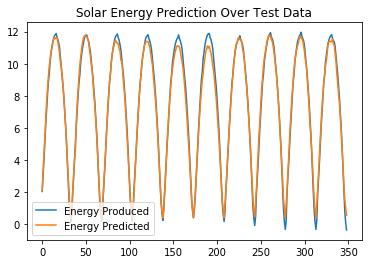

Mean squared error using SVM on Test: 0.37790895325648555
MAPE using SVM : 9.319750199926519


In [188]:
plt.plot(y_pred)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
print("Mean squared error using SVM on Test:", math.sqrt(m))
print("MAPE using SVM :", MAPE(y_test.values,y_pred))

### Applying SVM
<h5>X_train -> Temperature, Time, Previous Energy</h5>
<h5>Y_train -> Energy</h5>

In [189]:
from sklearn.svm import SVR
reg = SVR(kernel='linear',gamma = 'auto',C=10)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", math.sqrt(m))
print("MAPE using SVM :", MAPE(y_test.values,y_pred))

Mean squared error using SVM : 0.12429009866083322
MAPE using SVM : 2.259577426920666


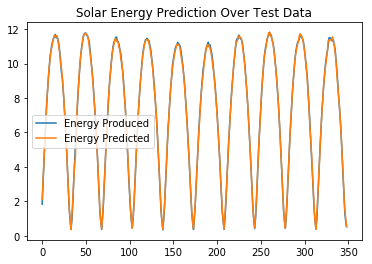

In [190]:
plt.plot(y_pred)
plt.plot(y_test.values)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()

In [191]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.613246035636323
Root Mean squared error using SVM on test data: 3.0308113963097028
Root Mean squared error using SVM on test data: 1.04878043838209
Root Mean squared error using SVM on test data: 0.506660773697509
Root Mean squared error using SVM on test data: 0.38872306671366075
Root Mean squared error using SVM on test data: 0.2401303219152098
Root Mean squared error using SVM on test data: 0.2386947537174345


In [192]:
m = mean_squared_error(y_test,y_pred)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))
print("Optimal Result of the Model :",opt_v)

MAPE using SVM : 4.742740539734366
Optimal Result of the Model : 0.2386947537174345


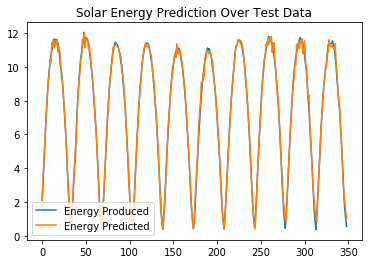

In [193]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()

In [194]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='poly',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.3445363802824145
Root Mean squared error using SVM on test data: 0.33078113377063983
Root Mean squared error using SVM on test data: 0.5371661012907146
Root Mean squared error using SVM on test data: 3.9904443625886206
Root Mean squared error using SVM on test data: 47.15988909483351
Root Mean squared error using SVM on test data: 447.5500184693151
Root Mean squared error using SVM on test data: 4254.219996042094


In [195]:
print("Optimal Result of the Model :",opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

Optimal Result of the Model : 0.33078113377063983
MAPE using SVM : 9.99399255466985


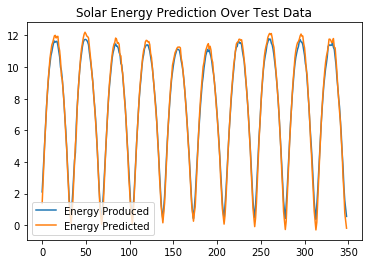

In [196]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()

## Using Temperature, Time, Previous Energy Produced, Humidity 
<h5>X_train -> Temperature, Previous Energy, Time, Humidity</h5>
<h5>Y_train -> Energy</h5>

In [108]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,humidity
0,84.88,0.706,1.366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51
1,84.65,1.366,2.404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
2,84.65,2.404,3.546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
3,84.65,3.546,4.682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
4,85.29,4.682,5.748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48


In [109]:
data['Humidity'] = hum[:len(hum)-1] 

In [210]:
train = data.iloc[:700]
test = data.iloc[700:969]

In [211]:
X_train = train.drop(['Predicted_Energy'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy'],axis=1)
y_test = test['Predicted_Energy']

### Applying machine learning models over this dataset :

In [854]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf',degree=1,gamma = 'auto',C=14)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

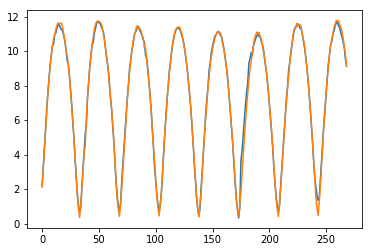

In [855]:
plt.plot(y_pred)
plt.plot(y_test.values)
plt.show()

In [856]:
m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", math.sqrt(m))
print("MAPE using SVM :", MAPE(y_test.values,y_pred))

Mean squared error using SVM : 0.267236146790922
MAPE using SVM : -3.631792992848388


## Time, Humidity, Temperature

In [125]:
train = data.iloc[:700]
test = data.iloc[700:969]
X_train = train.drop(['Predicted_Energy','Energy'],axis=1)
y_train = train['Energy']
X_test = test.drop(['Predicted_Energy','Energy'],axis=1)
y_test = test['Energy']

In [127]:
X_train = X_train.drop(['Humidity'],axis=1)
X_test = X_test.drop(['Humidity'],axis=1)

In [128]:
X_train.head()

,Temperature,0,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,humidity,cloudcover
0,84.88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.0
1,84.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0
2,84.65,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0
3,84.65,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0
4,85.29,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.0


In [860]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.6631819081344292
Root Mean squared error using SVM on test data: 3.5220439924771987
Root Mean squared error using SVM on test data: 2.192115506727029
Root Mean squared error using SVM on test data: 0.30546855627212194
Root Mean squared error using SVM on test data: 0.3344459874046033
Root Mean squared error using SVM on test data: 0.6819039699188539
Root Mean squared error using SVM on test data: 7.402994081148202


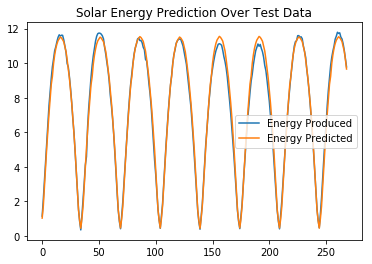

Mean squared error using SVM : 0.30546855627212194
MAPE using SVM : -0.23980564684978486


In [861]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [862]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.6210937705402975
Root Mean squared error using SVM on test data: 3.301594910651372
Root Mean squared error using SVM on test data: 2.8338251181019003
Root Mean squared error using SVM on test data: 2.6676153263593108
Root Mean squared error using SVM on test data: 1.1863593218260668
Root Mean squared error using SVM on test data: 0.5466823325678432
Root Mean squared error using SVM on test data: 0.5293002218062318


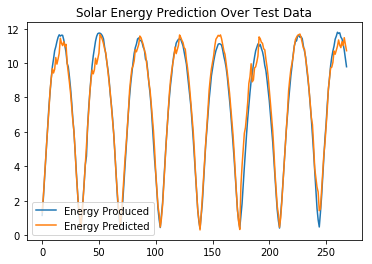

Mean squared error using SVM : 0.5293002218062318
MAPE using SVM : -5.34837491631926


In [863]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [746]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='poly',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.5224977652725356
Root Mean squared error using SVM on test data: 0.5572906396359355
Root Mean squared error using SVM on test data: 0.9212505494217959
Root Mean squared error using SVM on test data: 6.971659451808954
Root Mean squared error using SVM on test data: 94.25788662952714
Root Mean squared error using SVM on test data: 839.5733285163071
Root Mean squared error using SVM on test data: 8742.201010625755


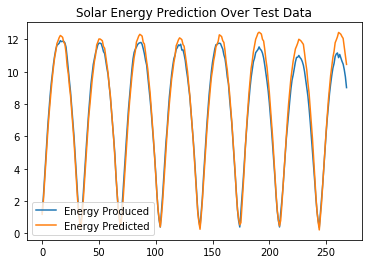

Mean squared error using SVM : 0.5224977652725356


In [747]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)

## Applying VAR Model

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
%matplotlib inline

1. From the above result we can see that eigen values are less then 1 so our data is stationary

In [218]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,27,28,29,30,31,32,33,34,humidity,Humidity
0,84.88,0.706,1.366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.51
1,84.65,1.366,2.404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.49
2,84.65,2.404,3.546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.49
3,84.65,3.546,4.682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.49
4,85.29,4.682,5.748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.48


In [219]:
data1 = data[['Temperature','Energy','Humidity','Predicted_Energy']]

In [220]:
#creating the train and validation set
train = data1[:int(0.8*(len(data1)))]
test = data1[int(0.8*(len(data1))):]

In [221]:
train.shape,test.shape

((839, 4), (210, 4))

In [222]:
#fit the model
model = VAR(endog=train)
model_fit = model.fit()

In [223]:
model_fit.y

array([[ 84.88 ,   0.706,   0.51 ,   1.366],
       [ 84.65 ,   1.366,   0.49 ,   2.404],
       [ 84.65 ,   2.404,   0.49 ,   3.546],
       ...,
       [108.68 ,   2.456,   0.17 ,   1.452],
       [108.68 ,   1.452,   0.17 ,   0.8  ],
       [108.68 ,   0.8  ,   0.17 ,   0.391]])

In [224]:
# make prediction on the test dataset
prediction = model_fit.forecast(model_fit.y, steps=len(test))

In [225]:
#converting predictions to pandas dataframe
import math
from sklearn.metrics import mean_squared_error
pred = pd.DataFrame(index=range(0,len(prediction)),columns=data1.columns)
for j in range(0,4):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

In [226]:
pred

,Temperature,Energy,Humidity,Predicted_Energy
0,104.091,0.391,0.253762,-0.0477298
1,100.619,-0.0477298,0.317583,-0.194189
2,97.2483,-0.194189,0.379848,-0.0807522
3,94.132,-0.0807522,0.43768,0.267449
4,91.3547,0.267449,0.489447,0.818674
5,88.9838,0.818674,0.533831,1.53684
6,87.0671,1.53684,0.569884,2.38312
7,85.6324,2.38312,0.597029,3.3175
8,84.6883,3.3175,0.615049,4.30034
9,84.226,4.30034,0.624064,5.29361


In [227]:
#printing the rmse of the model
for i in ['Temperature','Predicted_Energy']:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], test[i])))

rmse value for Temperature is :  9.684142054334377
rmse value for Predicted_Energy is :  3.387098237886395


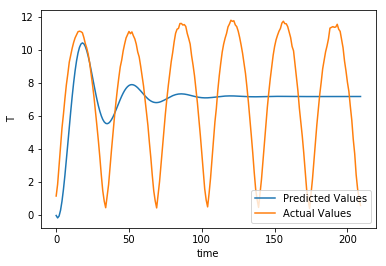

In [228]:
import matplotlib.pyplot as plt
plt.plot(pred['Predicted_Energy'].values)
plt.plot(test['Predicted_Energy'].values)
plt.xlabel("time")
plt.ylabel("T")
plt.legend(["Predicted Values","Actual Values"])

## adding cloud cover as one of the feature

In [120]:
data = data.drop(['Humidity'],axis=1)

In [121]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,humidity
0,84.88,0.706,1.366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51
1,84.65,1.366,2.404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
2,84.65,2.404,3.546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
3,84.65,3.546,4.682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
4,85.29,4.682,5.748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48


In [122]:
data['cloudcover'] = cloud[:len(cloud)-1]

In [123]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,27,28,29,30,31,32,33,34,humidity,cloudcover
0,84.88,0.706,1.366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.0
1,84.65,1.366,2.404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0
2,84.65,2.404,3.546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0
3,84.65,3.546,4.682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0
4,85.29,4.682,5.748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.0


In [129]:
train = data.iloc[:700]
test = data.iloc[700:969]
X_train = train.drop(['Predicted_Energy'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy'],axis=1)
y_test = test['Predicted_Energy']

In [130]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.38288765168143774
Root Mean squared error using SVM on test data: 0.33729892280477997
Root Mean squared error using SVM on test data: 0.22267821497465703
Root Mean squared error using SVM on test data: 0.12395234681349354
Root Mean squared error using SVM on test data: 0.12409794169501004
Root Mean squared error using SVM on test data: 0.21353224053774056
Root Mean squared error using SVM on test data: 1.6383909239230043


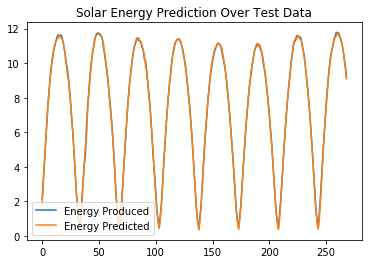

Mean squared error using SVM : 0.12395234681349354
MAPE using SVM : 2.3850606133603125


In [133]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [134]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='rbf',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 3.564017382421047
Root Mean squared error using SVM on test data: 2.9347272223603778
Root Mean squared error using SVM on test data: 0.8008051722056939
Root Mean squared error using SVM on test data: 0.296834061621396
Root Mean squared error using SVM on test data: 0.2694035884697774
Root Mean squared error using SVM on test data: 0.2073862979441974
Root Mean squared error using SVM on test data: 0.2125010418352044


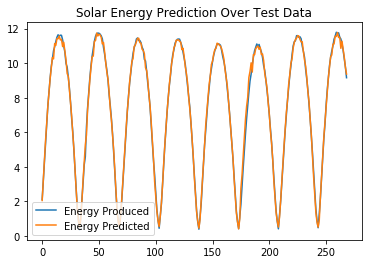

Mean squared error using SVM : 0.2073862979441974
MAPE using SVM : 3.1957850548784608


In [135]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

In [136]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='poly',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.307442197544747
Root Mean squared error using SVM on test data: 0.3248791968250988
Root Mean squared error using SVM on test data: 0.5508014959014038
Root Mean squared error using SVM on test data: 3.810969446860079
Root Mean squared error using SVM on test data: 53.905111410107004
Root Mean squared error using SVM on test data: 639.6858237538913
Root Mean squared error using SVM on test data: 4958.9507636208655


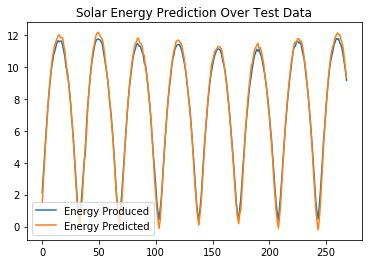

Mean squared error using SVM : 0.307442197544747
MAPE using SVM : 9.50442416431475


In [137]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

### Adding dewPoint as a feature 

In [138]:
data['dewPoint'] = dewpoint[:len(dewpoint)-1]

In [139]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,28,29,30,31,32,33,34,humidity,cloudcover,dewPoint
0,84.88,0.706,1.366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.0,64.47
1,84.65,1.366,2.404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,63.53
2,84.65,2.404,3.546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,63.53
3,84.65,3.546,4.682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,63.53
4,85.29,4.682,5.748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.0,63.44


In [140]:
train = data.iloc[:700]
test = data.iloc[700:969]
X_train = train.drop(['Predicted_Energy'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy'],axis=1)
y_test = test['Predicted_Energy']

In [145]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.3444274760834504
Root Mean squared error using SVM on test data: 0.33374383490550713
Root Mean squared error using SVM on test data: 0.22062317401870632
Root Mean squared error using SVM on test data: 0.12445560717538906
Root Mean squared error using SVM on test data: 0.12549283263723462
Root Mean squared error using SVM on test data: 0.31624253418948717
Root Mean squared error using SVM on test data: 2.3069205846049883


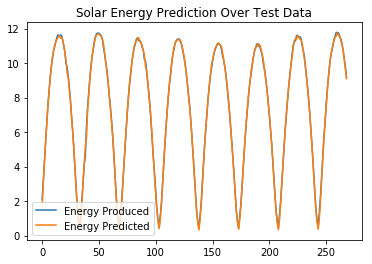

Mean squared error using SVM : 0.12445560717538906
MAPE using SVM : 2.4802372870791007


In [146]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

## Time, Temperature, Humidity, Previous Energy, Dew Point
### (REMOVING CLOUD COVER FEATURE)

In [154]:
train = data.iloc[:700]
test = data.iloc[700:969]
X_train = train.drop(['Predicted_Energy','cloudcover'],axis=1)
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy','cloudcover'],axis=1)
y_test = test['Predicted_Energy']

In [155]:
X_train.head()

,Temperature,Energy,0,1,2,3,4,5,6,7,...,27,28,29,30,31,32,33,34,humidity,dewPoint
0,84.88,0.706,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,64.47
1,84.65,1.366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,63.53
2,84.65,2.404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,63.53
3,84.65,3.546,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,63.53
4,85.29,4.682,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,63.44


In [150]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.34452897183775466
Root Mean squared error using SVM on test data: 0.3321841146530195
Root Mean squared error using SVM on test data: 0.22027033310736477
Root Mean squared error using SVM on test data: 0.12297646447890374
Root Mean squared error using SVM on test data: 0.12711527561812266
Root Mean squared error using SVM on test data: 0.3105685856142654
Root Mean squared error using SVM on test data: 1.7758369437720714


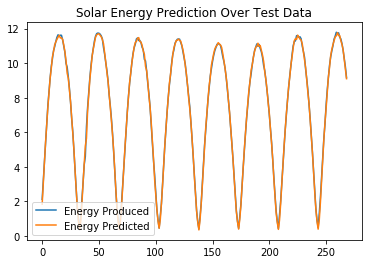

Mean squared error using SVM : 0.12297646447890374
MAPE using SVM : 2.331420007486949


In [151]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

## Adding Wind Speed to the model

In [169]:
data['windSpeed'] = windspeed[:len(windspeed)-1]

In [170]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,29,30,31,32,33,34,humidity,cloudcover,dewPoint,windSpeed
0,84.88,0.706,1.366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.51,0.0,64.47,6.60
1,84.65,1.366,2.404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,63.53,7.60
2,84.65,2.404,3.546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,63.53,7.60
3,84.65,3.546,4.682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,63.53,7.60
4,85.29,4.682,5.748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.0,63.44,8.57


In [171]:
train = data.iloc[:700]
test = data.iloc[700:969]
X_train = train.drop(['Predicted_Energy','cloudcover'],axis=1)  # adding cloud cover decreasing the rmse score so removing it from the feature set
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy','cloudcover'],axis=1)
y_test = test['Predicted_Energy']

In [172]:
X_train.head()

,Temperature,Energy,0,1,2,3,4,5,6,7,...,28,29,30,31,32,33,34,humidity,dewPoint,windSpeed
0,84.88,0.706,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51,64.47,6.60
1,84.65,1.366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,63.53,7.60
2,84.65,2.404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,63.53,7.60
3,84.65,3.546,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,63.53,7.60
4,85.29,4.682,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,63.44,8.57


In [173]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100,1000]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.3444021333110154
Root Mean squared error using SVM on test data: 0.3351765422921573
Root Mean squared error using SVM on test data: 0.22685309271956042
Root Mean squared error using SVM on test data: 0.126085813527154
Root Mean squared error using SVM on test data: 0.12075786514553252
Root Mean squared error using SVM on test data: 0.2772174547891742
Root Mean squared error using SVM on test data: 3.032893974534154


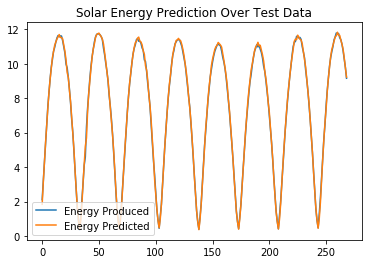

Mean squared error using SVM : 0.12075786514553252
MAPE using SVM : 2.000547183857574


In [174]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))

### Adding windBearing as a feature

In [175]:
data['windBearing'] = wBearing[:len(wBearing)-1]

In [176]:
data.head()

,Temperature,Energy,Predicted_Energy,0,1,2,3,4,5,6,...,30,31,32,33,34,humidity,cloudcover,dewPoint,windSpeed,windBearing
0,84.88,0.706,1.366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.51,0.0,64.47,6.60,235
1,84.65,1.366,2.404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.49,0.0,63.53,7.60,229
2,84.65,2.404,3.546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.49,0.0,63.53,7.60,229
3,84.65,3.546,4.682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.49,0.0,63.53,7.60,229
4,85.29,4.682,5.748,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.48,0.0,63.44,8.57,233


In [177]:
train = data.iloc[:700]
test = data.iloc[700:969]
X_train = train.drop(['Predicted_Energy','cloudcover'],axis=1)  # adding cloud cover decreasing the rmse score so removing it from the feature set
y_train = train['Predicted_Energy']
X_test = test.drop(['Predicted_Energy','cloudcover'],axis=1)
y_test = test['Predicted_Energy']

In [178]:
# applying SVM over the data using rbf kernel
from sklearn.svm import SVR
opt_v = 99999
y_opt = []
for c in [.001,.01,.1,1,10,100]:
    reg = SVR(kernel='linear',gamma = 'auto',C=c)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    y_pred1 = reg.predict(X_train)
    m = mean_squared_error(y_test,y_pred)
    m1 = mean_squared_error(y_train,y_pred1)
    print("Root Mean squared error using SVM on test data:", math.sqrt(m))
    #print("Root Mean squared error using SVM on train data:", math.sqrt(m1))
    if math.sqrt(m) < opt_v:
        opt_v = math.sqrt(m)
        y_opt = y_pred

Root Mean squared error using SVM on test data: 0.34012282720761267
Root Mean squared error using SVM on test data: 0.3198603886476267
Root Mean squared error using SVM on test data: 0.20986910454706595
Root Mean squared error using SVM on test data: 0.13004433427656825
Root Mean squared error using SVM on test data: 0.2329294590912471
Root Mean squared error using SVM on test data: 2.1132251415468843
Root Mean squared error using SVM on test data: 23.80952797492493


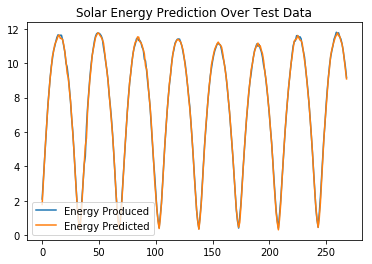

Mean squared error using SVM : 0.13004433427656825
MAPE using SVM : 2.5607316404799314


In [179]:
plt.plot(y_test.values)
plt.plot(y_opt)
plt.legend(["Energy Produced","Energy Predicted"])
plt.title("Solar Energy Prediction Over Test Data")
plt.show()
#m = mean_squared_error(y_test,y_pred)
print("Mean squared error using SVM :", opt_v)
print("MAPE using SVM :", MAPE(y_test.values,y_opt))